In [154]:
import hazm
import pandas as pd
from parsivar import Normalizer
from parsivar import Tokenizer
from __future__ import unicode_literals
from hazm import *
import matplotlib.pyplot as plt
from copy import deepcopy

In [155]:
VEHICLES = "vehicles"
DE = "electronic-devices"
BUISINESSES = "businesses"
HOME = "for-the-home"
PERSONAL = "personal"
HOBBIES = "leisure-hobbies"

In [156]:
dataTest = pd.read_csv("divar_data\Data\divar_test.csv") # ,quoting= csv.QUOTE_NONE, error_bad_lines=False 
print(dataTest)

dataTrain = pd.read_csv("divar_data\Data\divar_train.csv") 
#print(dataTrain)

                                title  \
0                        کیف مجلسی نو   
1               دیوار کوب نمدی تزیینی   
2     دو تیکه بسیار بسیار تمیز و سالم   
3                                مودم   
4      تعداد18عددبوقلمون به قیمت عمده   
...                               ...   
1795                 باسکول 300کیلویی   
1796           میز مدیریتی با کنفرانس   
1797                        باند aiwa   
1798                  عروس هلندی مولد   
1799      ست دستباف دخترانه یکساله نو   

                                            description          categories  
0                                      کیف مجلسی نوی نو            personal  
1                                  مناسب برای جهاز عروس        for-the-home  
2                                    با کشوی مخفی و شیک        for-the-home  
3     سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد \nم...  electronic-devices  
4     سلام تعدای بوقلمون دارم به علت جابه جایی به فر...     leisure-hobbies  
...                                    

In [157]:
def deleteStopWords(words, stopWords):
    removeIndex = []
    for i in range(len(words)):
        if words[i] in stopWords:
            removeIndex.append(i)
    count = 0
    for i in range(len(removeIndex)):
        words.remove(words[removeIndex[i] - count])
        count += 1
        
    return words

def stem(words):
    stemmer = Stemmer()
    words = [stemmer.stem(word) for word in words]
    return words

def lemmatize(words):
    lemmatizer = Lemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

def placement(words):
    for i in range(len(words)):
        words[i] = words[i].replace( "\n","")
        words[i] = words[i].replace( "\t","")
        words[i] = words[i].replace( "...","")
    return words

In [158]:
def normilize(dataTrain):
    stopWords = set(hazm.stopwords_list("stopword2.txt"))
    descriptionData = dataTrain['description']
    descriptionWords = []
    titleData = dataTrain['title']     
    titleWords = []    
    
    my_normalizer = Normalizer()
    my_tokenizer = Tokenizer()

    words = []
    for i in range(len(descriptionData)):
        if(descriptionData[i]):
            descriptionData[i] = my_normalizer.normalize(descriptionData[i])
            words = my_tokenizer.tokenize_words(my_normalizer.normalize(descriptionData[i]))
            words = deleteStopWords(words, stopWords)
            words = placement(words)
            descriptionWords.append(words)
            

    for i in range(len(titleData)):
        if(titleData[i]):
            titleData[i] = my_normalizer.normalize(titleData[i])
            words = my_tokenizer.tokenize_words(my_normalizer.normalize(titleData[i]))
            words = deleteStopWords(words, stopWords)
            words = placement(words)
            titleWords.append(words)

    return descriptionWords, titleWords

In [159]:
descriptionWords, titleWords = normilize(dataTrain)
descriptionWordsTest, titleWordsTest = normilize(dataTest)

part 2

In [160]:
def preProcess(category, descriptionWords, titleWords, categories):
    countData = {}
    countUnique = 0
    countAll = 0
    
    for i in range(len(descriptionWords)):
        if categories[i] == category:
            for word in descriptionWords[i]:
                if word in countData:
                    countData[word] += 1
                    countAll += 1
                else:
                    countData[word] = 1
                    countAll += 1
                    countUnique += 1
    for i in range(len(titleWords)):
        if categories[i] == category:
            for word in titleWords[i]:
                if word in countData:
                    countData[word] += 1
                    countAll += 1
                else:
                    countData[word] = 1
                    countAll += 1
                    countUnique += 1
    return countData, countUnique, countAll

def findSmoothProb(words, data, countCat, countAll, countUnique):
    prob = countCat/countAll
    for word in words:
        if word in data:
            prob *= (data[word]+1)/(countCat + countUnique + 1)
        else:
            prob *= 1/(countCat + countUnique + 1)
            
    return prob

def findProb(words, data, countCat, countAll):
    prob = countCat/countAll
    for word in words:
        if word in data:
            prob *= data[word]/countCat
        else:
            return 0
    return prob


In [161]:
categories = dataTrain['categories']

vehicle, countUnique_v, countAll_v = preProcess(VEHICLES, descriptionWords,titleWords, categories)
devices, countUnique_d, countAll_d = preProcess(DE, descriptionWords,titleWords, categories)
Businesses, countUnique_b, countAll_b = preProcess(BUISINESSES, descriptionWords,titleWords, categories)
home, countUnique_h, countAll_h = preProcess(HOME, descriptionWords,titleWords, categories)
personal, countUnique_p, countAll_p = preProcess(PERSONAL, descriptionWords,titleWords, categories)
hobby, countUnique_l, countAll_l = preProcess(HOBBIES, descriptionWords,titleWords, categories)

count = countAll_v + countAll_d+ countAll_b+ countAll_h+ countAll_p+ countAll_l

In [162]:
#import arabic_reshaper 
text = "عروس هلندی ۲۵روزه که توسط والدینش تغذیه شده لطفا فقط تماس بگیرید"
#text = "تعداد سه عدد قفسه میوه فلزی کاملا سالم به فروش میرسد . فروش فوری زیر قیمت"
#text = "فروش سیمان تیپ 2 تهران مستقیم از کارخانه"

my_normalizer = Normalizer()
my_tokenizer = Tokenizer()

words = my_tokenizer.tokenize_words(my_normalizer.normalize(text))
text = deleteStopWords(words, set(hazm.stopwords_list("stopword2.txt")))

print(text)
print("probability vehicle", findProb(words, vehicle, countAll_v, count))
print("probability devices", findProb(words, devices, countAll_d, count))
print("probability Businesses", findProb(words, Businesses, countAll_b, count))
print("probability home", findProb(words, home, countAll_h, count))
print("probability personal", findProb(words, personal, countAll_p, count))
print("probability hobby", findProb(words, hobby, countAll_l, count))

print("Smoth probability vehicle", findSmoothProb(words, vehicle, countAll_v, count, countUnique_v))
print("Smoth probability devices", findSmoothProb(words, devices, countAll_d, count, countUnique_d))
print("Smoth probability Businesses", findSmoothProb(words, Businesses, countAll_b, count, countUnique_b))
print("Smoth probability home", findSmoothProb(words, home, countAll_h, count, countUnique_h))
print("Smoth probability personal", findSmoothProb(words, personal, countAll_p, count, countUnique_p))
print("Smoth probability hobby", findSmoothProb(words, hobby, countAll_l, count, countUnique_l))



['عروس', 'هلندی', '۲۵روزه', 'والدینش', 'تغذیه', 'لطفا', 'تماس', 'بگیرید']
probability vehicle 0
probability devices 0
probability Businesses 0
probability home 0
probability personal 0
probability hobby 0
Smoth probability vehicle 3.162418895127979e-32
Smoth probability devices 7.087732456069737e-32
Smoth probability Businesses 1.5870570536364179e-31
Smoth probability home 2.3890308726880282e-30
Smoth probability personal 8.487377203027935e-30
Smoth probability hobby 3.705196604475744e-27


In [163]:
def plotCatgory(category):
    cat = deepcopy(category)
    categorySort = sorted(cat.items(), key=lambda x: x[1], reverse=True)
    c1 = [i[0] for i in categorySort]
    c2 = [i[1] for i in categorySort]
    
    DuplicateWords = set(hazm.stopwords_list("Duplicate_words.txt"))
    count = 0
    while(count < 5):
        if c1[count] in DuplicateWords:
            c1.remove(c1[count])
            c2.remove(c2[count])
        else:
            count += 1
    
    plt.xlabel("words")
    plt.ylabel("The number of repetitions")
    plt.bar(c1[:5], c2[:5])
    plt.show()

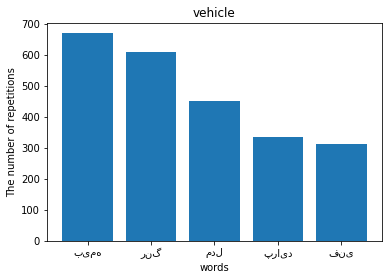

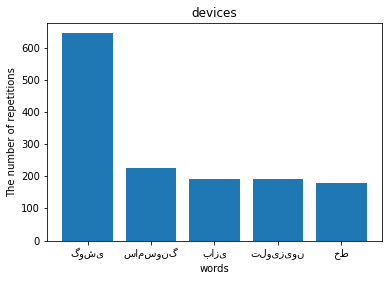

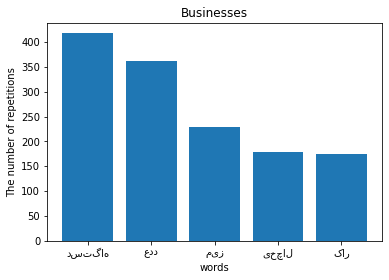

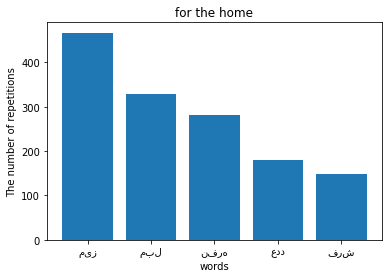

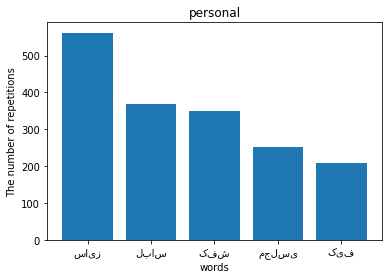

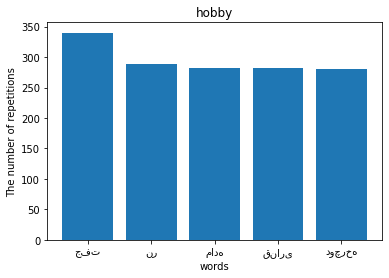

In [164]:
plt.title("vehicle")
plotCatgory(vehicle)

plt.title("devices")
plotCatgory(devices)

plt.title("Businesses")
plotCatgory(Businesses)

plt.title("for the home")
plotCatgory(home)

plt.title("personal")
plotCatgory(personal)

plt.title("hobby")
plotCatgory(hobby)


In [167]:
correctDetected = {
    VEHICLES : 0,
    DE : 0,
    BUISINESSES : 0,
    HOME : 0,
    PERSONAL : 0,
    HOBBIES : 0,    
}

allDetected = {
    VEHICLES : 0,
    DE : 0,
    BUISINESSES : 0,
    HOME : 0,
    PERSONAL : 0,
    HOBBIES : 0,    
}

precision = {
    VEHICLES : 0,
    DE : 0,
    BUISINESSES : 0,
    HOME : 0,
    PERSONAL : 0,
    HOBBIES : 0,  
}

recall = {
    VEHICLES : 0,
    DE : 0,
    BUISINESSES : 0,
    HOME : 0,
    PERSONAL : 0,
    HOBBIES : 0,  
}

F1 = {
    VEHICLES : 0,
    DE : 0,
    BUISINESSES : 0,
    HOME : 0,
    PERSONAL : 0,
    HOBBIES : 0,  
}

classTotal = {
    VEHICLES : 0,
    DE : 0,
    BUISINESSES : 0,
    HOME : 0,
    PERSONAL : 0,
    HOBBIES : 0,  
}


part 3

In [166]:
categoryTest = dataTest['categories']
for i in range(len(descriptionWordsTest)):
    vP = findProb(descriptionWordsTest[i], vehicle, countAll_v, count)
    dP = findProb(descriptionWordsTest[i], devices, countAll_d, count)
    bP = findProb(descriptionWordsTest[i], Businesses, countAll_b, count)
    hP = findProb(descriptionWordsTest[i], home, countAll_h, count)
    pP = findProb(descriptionWordsTest[i], personal, countAll_p, count)
    lP = findProb(descriptionWordsTest[i], hobby, countAll_l, count)

    maxP = max(vP, dP, bP, hP, pP, lP)
    options = { 
        vP : VEHICLES,
        dP : DE,
        bP : BUISINESSES,
        hP : HOME,
        pP : PERSONAL,
        lP : HOBBIES,
    }
    
    category = options[maxP]
    allDetected[category] += 1
    classTotal[categoryTest[i]] += 1
    if category == categoryTest[i]:
        correctDetected[category] += 1

totalClass = len(descriptionWordsTest)
Accuracy = correctDetected[VEHICLES] + correctDetected[DE] + correctDetected[BUISINESSES]
Accuracy += correctDetected[HOME] + correctDetected[PERSONAL] + correctDetected[HOBBIES]
Accuracy /= totalClass
print("Accuracy is ", Accuracy)

for word in precision.keys():
    precision[word] = correctDetected[word]/allDetected[word]

print(precision)

for word in recall.keys():
    recall[word] = correctDetected[word]/classTotal[word]

print(recall)

for word in F1.keys():
    F1[word] = 2* (precision[word]*recall[word])/ (precision[word] + recall[word])

print(F1)
#################################
Macro_F1 = 0
for word in F1.keys():
    Macro_F1 += F1[word]
print("Macro F1: ", Macro_F1 / 6)

weighted_F1 = 0
total = 0
for word in F1.keys():
    Macro_F1 += F1[word]*classTotal[word]
    total += classTotal[word]

print("Weighted F1: " , Macro_F1/total)

f1 = 0
f2 = 0
for word in precision.keys():
    f1 += correctDetected[word]
    f2 += allDetected[word]
pre = f1/f2

g1 = 0
g2 = 0
for word in recall.keys():
    f1 += correctDetected[word]
    f2 += classTotal[word]
rec = f1 / f2

if rec == pre:
    print("Micro F1", rec)

Accuracy is  0.35833333333333334
{'vehicles': 0.7835051546391752, 'electronic-devices': 0.6746987951807228, 'businesses': 0.7291666666666666, 'for-the-home': 0.7522935779816514, 'personal': 0.76, 'leisure-hobbies': 0.21673003802281368}
{'vehicles': 0.25333333333333335, 'electronic-devices': 0.18666666666666668, 'businesses': 0.23333333333333334, 'for-the-home': 0.2733333333333333, 'personal': 0.25333333333333335, 'leisure-hobbies': 0.95}
{'vehicles': 0.3828715365239295, 'electronic-devices': 0.2924281984334204, 'businesses': 0.3535353535353536, 'for-the-home': 0.4009779951100244, 'personal': 0.38, 'leisure-hobbies': 0.35294117647058826}
Macro F1:  0.36045904334555273
Weighted F1:  0.36166057349003783
Micro F1 0.35833333333333334


In [168]:

categoryTest = dataTest['categories']
for i in range(len(descriptionWordsTest)):
    vP = findSmoothProb(descriptionWordsTest[i]+titleWordsTest[i], vehicle, countAll_v, count, countUnique_v)
    dP = findSmoothProb(descriptionWordsTest[i]+titleWordsTest[i], devices, countAll_d, count, countUnique_d)
    bP = findSmoothProb(descriptionWordsTest[i]+titleWordsTest[i], Businesses, countAll_b, count, countUnique_b)
    hP = findSmoothProb(descriptionWordsTest[i]+titleWordsTest[i], home, countAll_h, count, countUnique_h)
    pP = findSmoothProb(descriptionWordsTest[i]+titleWordsTest[i], personal, countAll_p, count, countUnique_p)
    lP = findSmoothProb(descriptionWordsTest[i]+titleWordsTest[i], hobby, countAll_l, count, countUnique_l)


    maxP = max(vP, dP, bP, hP, pP, lP)
    options = { 
        vP : VEHICLES,
        dP : DE,
        bP : BUISINESSES,
        hP : HOME,
        pP : PERSONAL,
        lP : HOBBIES,
    }
    
    category = options[maxP]
    allDetected[category] += 1
    classTotal[categoryTest[i]] += 1
    if category == categoryTest[i]:
        correctDetected[category] += 1

totalClass = len(descriptionWordsTest)
Accuracy = 0
Accuracy = correctDetected[VEHICLES] + correctDetected[DE] + correctDetected[BUISINESSES]
Accuracy += correctDetected[HOME] + correctDetected[PERSONAL] + correctDetected[HOBBIES]
Accuracy /= totalClass
print("Accuracy is ", Accuracy)

for word in precision.keys():
    precision[word] = correctDetected[word]/allDetected[word]

print("precision: ",precision)

for word in recall.keys():
    recall[word] = correctDetected[word]/classTotal[word]

print("recall: ",recall)

for word in F1.keys():
    F1[word] = 2* (precision[word]*recall[word])/ (precision[word] + recall[word])

print("F1: ", F1)

Accuracy is  0.8544444444444445
precision:  {'vehicles': 0.9347079037800687, 'electronic-devices': 0.9238754325259516, 'businesses': 0.775438596491228, 'for-the-home': 0.7307692307692307, 'personal': 0.8721311475409836, 'leisure-hobbies': 0.924812030075188}
recall:  {'vehicles': 0.9066666666666666, 'electronic-devices': 0.89, 'businesses': 0.7366666666666667, 'for-the-home': 0.8866666666666667, 'personal': 0.8866666666666667, 'leisure-hobbies': 0.82}
F1:  {'vehicles': 0.9204737732656515, 'electronic-devices': 0.9066213921901528, 'businesses': 0.7555555555555555, 'for-the-home': 0.8012048192771084, 'personal': 0.8793388429752066, 'leisure-hobbies': 0.8692579505300353}
